In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#1. Read the csv file named College
df=pd.read_csv('College.csv')
print(df.head())

                     Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.R

In [2]:
df.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

In [3]:
'''2. Look at the data used in the notebook by creating and running
 a new cell with just the code college in it. You should notice
 that the first column is just the name of each university in a
 column named something like Unnamed: 0. We don’t really want
 pandas to treat this as data. However, it may be handy to have
 these names for later. Try the following commands and similarly
 look at the resulting data frames:'''

df=df.rename({'Unnamed: 0': 'College_Name'},axis=1)
df.set_index('College_Name')
print(df.head())

                   College_Name Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.R

In [4]:
'''3. Use the describe() method of to produce a numerical summary
 of the variables in the data set.'''

print(df.describe())

               Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      

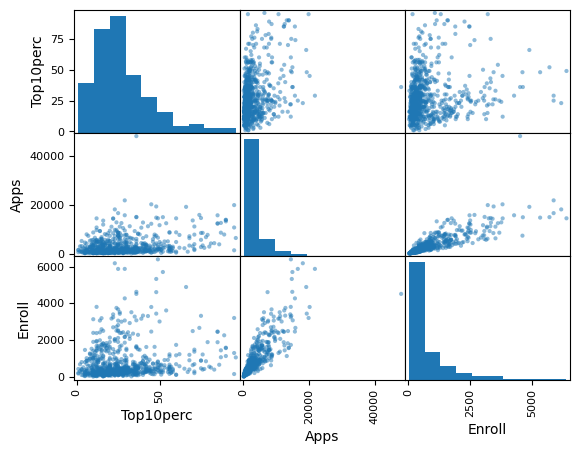

In [5]:
'''4.  Use the pd.plotting.scatter_matrix() function to produce a
 scatterplot matrix of the first columns [Top10perc, Apps, Enroll].
 Recall that you can reference a list C of columns of a data frame
 A using A[C].'''

''' pd.plotting.scatter_matrix() function to create a scat- pd.plotting.
 terplot matrix to visualize all of the pairwise relationships between the
 columns in a data frame.'''
ans1= pd.plotting.scatter_matrix(df[['Top10perc','Apps','Enroll']]);

In [6]:
# Getting the categorical data
categorical_df = df.select_dtypes(include=['object'])
categorical_df.drop('College_Name', axis=1, inplace=True)
categorical_df.head()

,Private
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes


In [7]:
#Getting the Continuous data
continuous_df = df.select_dtypes(include=['float64', 'int64'])
continuous_df.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


<Axes: title={'center': 'Outstate'}, xlabel='Private'>

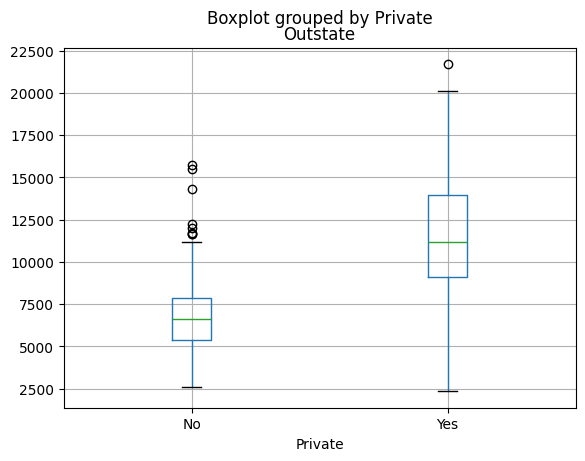

In [8]:
 '''5. Use the boxplot() method of college to produce side-by-side
 boxplots of Outstate versus Private'''
 df.boxplot(column='Outstate',by='Private')


In [9]:
'''6. Create a new qualitative variable, called Elite,bybinning the
 Top10perc variable into two groups based on whether or not the
 proportion of students coming from the top 10% of their high
 school classes exceeds 50%.'''
df['Elite']=pd.cut(df['Top10perc'],
                   bins=[0,50,100],
                   labels=['No','Yes'])
print(df.head())

                   College_Name Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.R

In [10]:
''' Use the value_counts() method of college['Elite'] to see how
 manyelite universities there are.'''

elite_counts = df['Elite'].value_counts()
print(elite_counts)

Elite
No     699
Yes     78
Name: count, dtype: int64


<Axes: title={'center': 'Outstate'}, xlabel='Elite'>

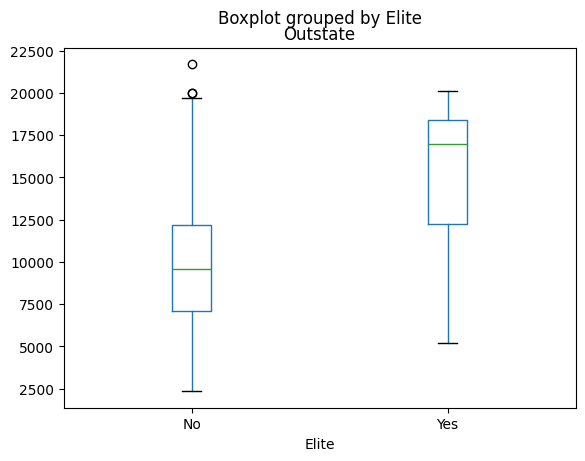

In [11]:
'''Finally, use the boxplot() method
 again to produce side-by-side boxplots of Outstate versus Elite.'''

df.boxplot(column='Outstate', by='Elite', grid=False)

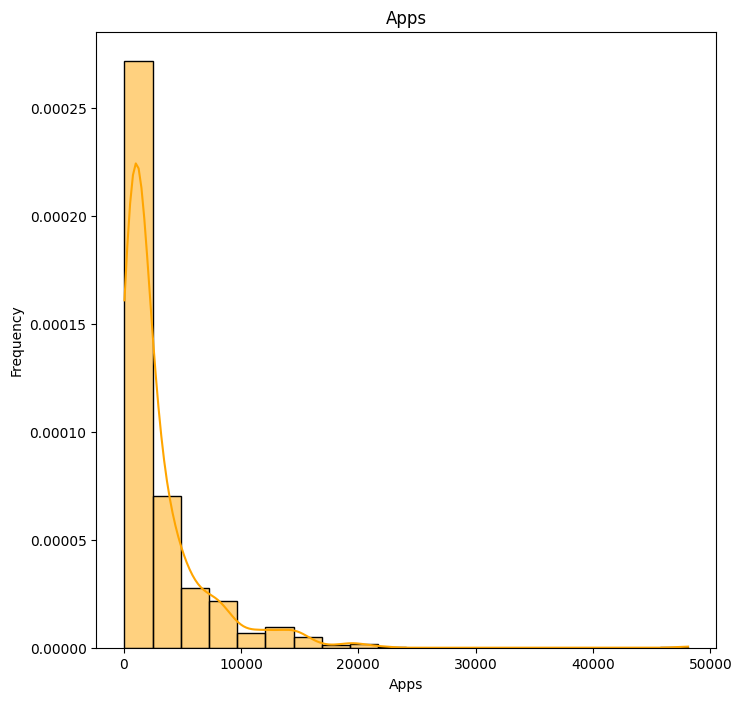

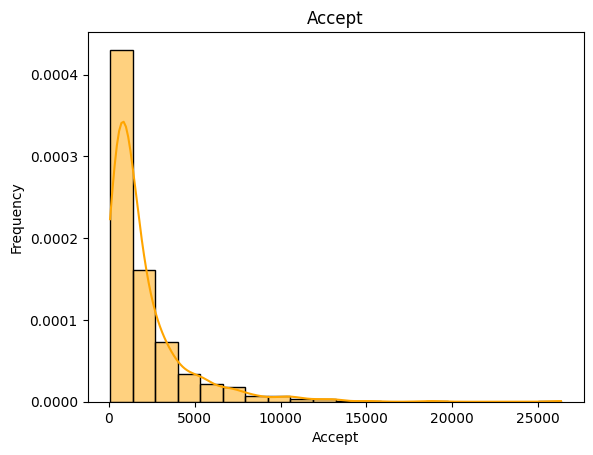

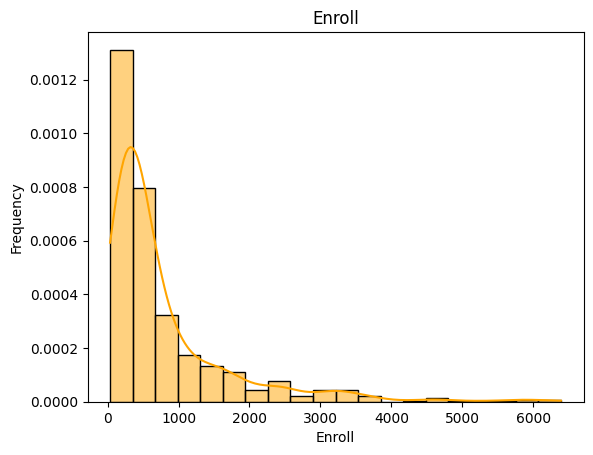

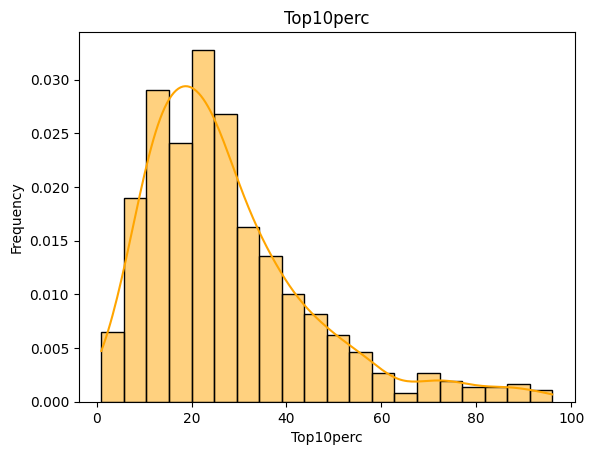

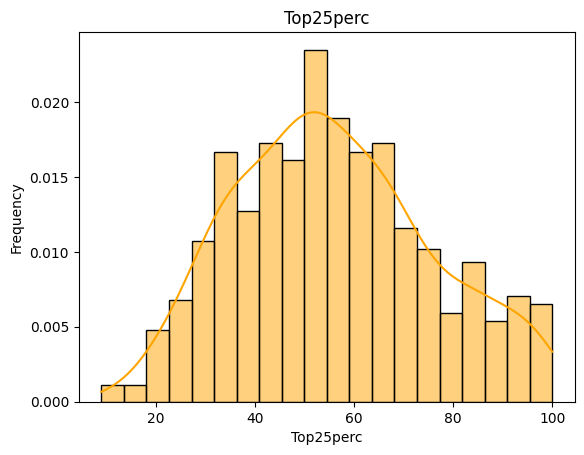

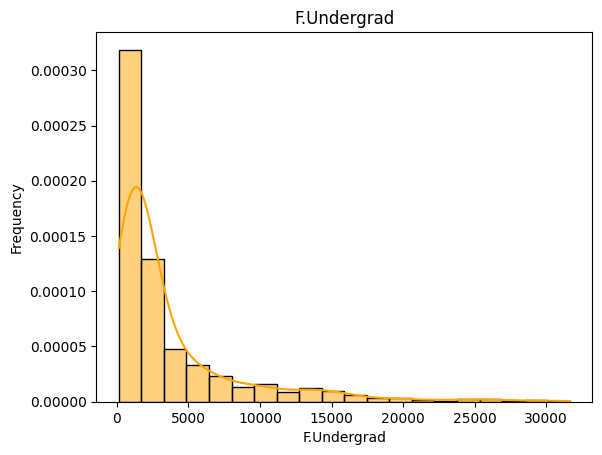

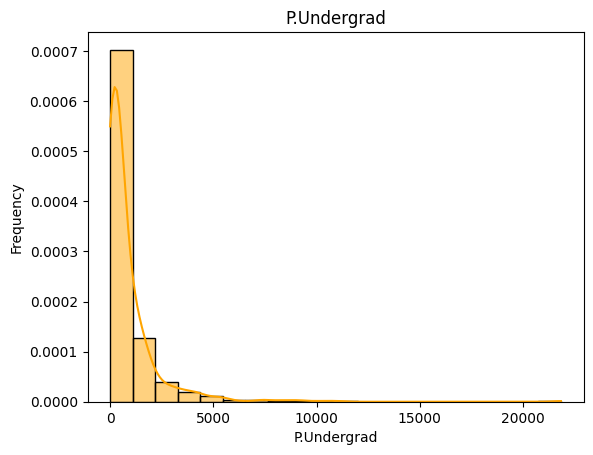

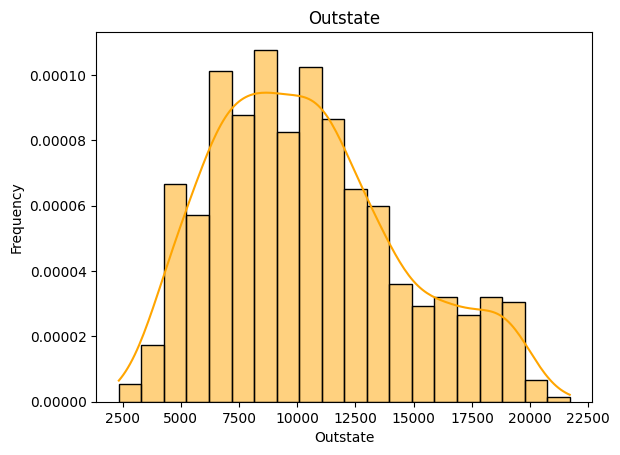

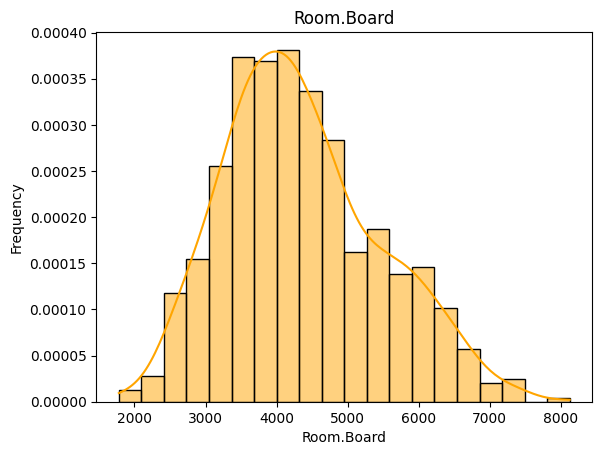

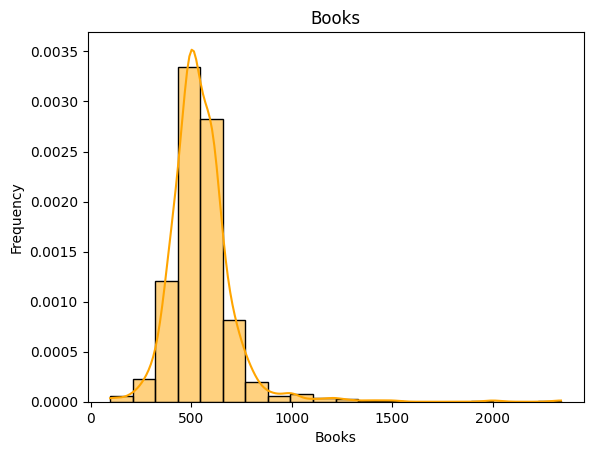

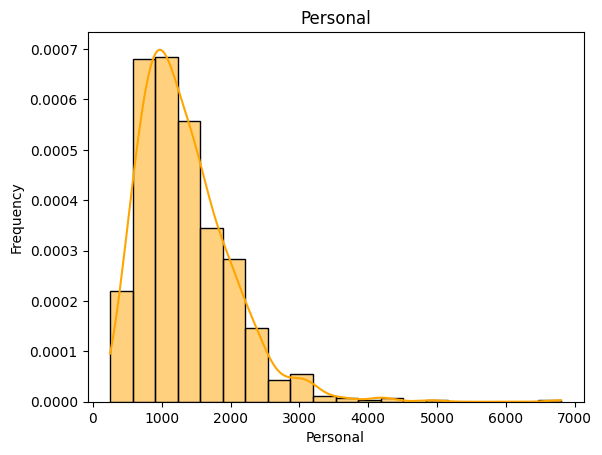

In [ ]:
'''7.  Use the plot.hist() method of college to produce some histograms with differing numbers of bins for a few of the quantitative variables. The command plt.subplots(2, 2) may be useful: it will divide the plot window into four regions so that four
 plots can be made simultaneously. By changing the arguments
 you can divide the screen up in other combinations.'''

fig,ax=plt.subplots(figsize=(8,8))
for i in continuous_df:
  sns.histplot(continuous_df[i], color='orange',edgecolor='black',kde=True,bins=20,stat='density')
  plt.title(i)
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.show()


# Here kde=True shows that it is including a Population density Function
# stat='density' shows that it is the data has been represented in a normalised form


In [ ]:
'''Continue exploring the data, and provide a brief summary of
 what you discover.'''